#DATA VISUALISATION OF BIRDS STRIKE

####Reading the Birds_strike_data

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Bird_Strike_Data.csv to Bird_Strike_Data.csv


###Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('Bird_Strike_Data.csv')
data

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,None,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,None,12/30/11 0:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,None,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

###Splitting the month and year

In [5]:
data['FlightDate']=pd.to_datetime(data['FlightDate'])

data['month']=data['FlightDate'].dt.month
data['year']=data['FlightDate'].dt.year

In [6]:
missing_values=data.isnull().sum()
print(missing_values)

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

In [7]:
data['Aircraft: Type']=data['Aircraft: Type'].str.upper()

In [8]:
print(data.columns)

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'month', 'year'],
      dtype='object')


###Cleaning the dataset

In [9]:
data.drop(['Record ID','Remarks'],axis=1,inplace=True)

In [10]:
clean_data=data
clean_data

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,month,year
0,AIRPLANE,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes,11.0,2000.0
1,AIRPLANE,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,7.0,2001.0
2,AIRPLANE,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,2,...,Small,No Cloud,European starling,N,0,50,0,No,9.0,2001.0
3,AIRPLANE,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,9.0,2002.0
4,AIRPLANE,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,2,...,Small,No Cloud,European starling,N,0,50,0,No,6.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,AIRPLANE,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,None,2011-12-30,No damage,2,...,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No,12.0,2011.0
25554,AIRPLANE,ORLANDO INTL,< 1000 ft,A-321,1,1,None,2011-12-30,No damage,2,...,Small,Some Cloud,Tree swallow,Y,0,0,0,No,12.0,2011.0
25555,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,NaN,...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN,NaN,NaN
25556,AIRPLANE,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,None,2011-12-31,No damage,2,...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes,12.0,2011.0


###Unique phase of flight

In [11]:
print(data['When: Phase of flight'].unique())

['Climb' 'Landing Roll' 'Approach' 'Take-off run' 'Descent' nan 'Taxi'
 'Parked']


### First and Last 10 species names

In [12]:
print("First 10 species name")
print(data['Wildlife: Species'].value_counts().head(10))
print("\n")
print("Last 10 species name")
print(data['Wildlife: Species'].value_counts().tail(10))


First 10 species name
Unknown bird - small     10505
Unknown bird - medium     4318
Mourning dove              898
European starling          885
Unknown bird - large       797
Rock pigeon                596
Barn swallow               579
Killdeer                   470
American kestrel           444
Red-tailed hawk            412
Name: Wildlife: Species, dtype: int64


Last 10 species name
Red-naped sapsucker     1
Ptarmigans              1
Fairy tern              1
Common merganser        1
Prairie dog             1
Cape May warbler        1
Western bluebird        1
Common ground-dove      1
Yellow-billed magpie    1
Pine grosbeak           1
Name: Wildlife: Species, dtype: int64


In [13]:
print(clean_data.columns)

Index(['Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'month', 'year'],
      dtype='object')


###Year Analysis

In [14]:
clean_data['year'].value_counts().sort_index()

2000.0    1367
2001.0    1230
2002.0    1681
2003.0    1568
2004.0    1692
2005.0    1853
2006.0    2159
2007.0    2301
2008.0    2258
2009.0    3247
2010.0    3121
2011.0    2952
Name: year, dtype: int64

##Number of bird strikes

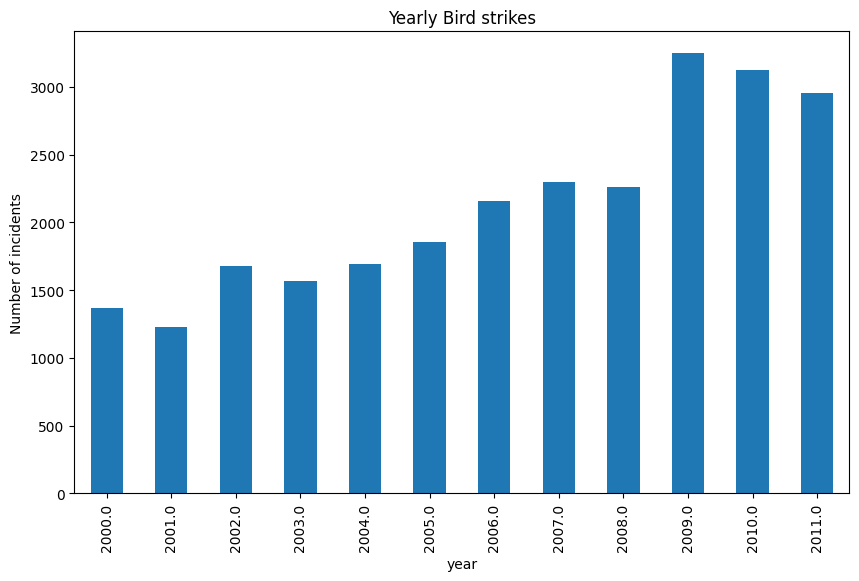

In [15]:
plt.figure(figsize=(10,6))
clean_data['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Yearly Bird strikes')
plt.xlabel('year')
plt.ylabel('Number of incidents')
plt.show()

In [16]:
US_states=print(clean_data['Origin State'].unique())

['New York' 'Texas' 'Louisiana' 'Washington' 'Virginia' nan 'Delaware'
 'DC' 'Georgia' 'Florida' 'California' 'Illinois' 'Connecticut' 'Missouri'
 'Rhode Island' 'Hawaii' 'Arizona' 'Tennessee' 'South Carolina'
 'South Dakota' 'New Jersey' 'Colorado' 'Minnesota' 'Alabama' 'Ohio'
 'Wisconsin' 'Michigan' 'Massachusetts' 'Alaska' 'North Carolina'
 'Kentucky' 'Indiana' 'Oregon' 'Pennsylvania' 'New Hampshire' 'Arkansas'
 'Nevada' 'Mississippi' 'Maryland' 'Maine' 'Quebec' 'Idaho'
 'British Columbia' 'Utah' 'Nebraska' 'Iowa' 'New Mexico' 'West Virginia'
 'Oklahoma' 'North Dakota' 'Vermont' 'Wyoming' 'Kansas'
 'Prince Edward Island' 'Montana' 'Puerto Rico' 'Ontario' 'Virgin Islands'
 'Newfoundland and Labrador' 'Alberta' 'Saskatchewan']


In [17]:
valid_us_states = ['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', 'Delaware', 'DC', 'Georgia', 'Florida', 'California', 'Illinois', 'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona', 'Tennessee', 'South Carolina', 'South Dakota', 'New Jersey', 'Colorado', 'Minnesota', 'Alabama', 'Ohio', 'Wisconsin', 'Michigan', 'Massachusetts', 'Alaska', 'North Carolina', 'Kentucky', 'Indiana', 'Oregon', 'Pennsylvania', 'New Hampshire', 'Arkansas', 'Nevada', 'Mississippi', 'Maryland', 'Maine', 'Utah', 'Nebraska', 'Iowa', 'New Mexico', 'West Virginia', 'Oklahoma', 'North Dakota', 'Vermont', 'Wyoming', 'Kansas', 'Montana']
bird_strikes_us_states = clean_data[clean_data['Origin State'].isin(valid_us_states)]
bird_strikes_by_state=bird_strikes_us_states['Origin State'].value_counts()
bird_strikes_by_state

California        2520
Texas             2453
Florida           2055
New York          1319
Illinois          1008
Pennsylvania       986
Missouri           960
Kentucky           812
Ohio               778
Hawaii             729
Michigan           678
Colorado           664
Tennessee          655
North Carolina     652
New Jersey         600
Georgia            510
Utah               496
Maryland           433
DC                 432
Louisiana          397
Oregon             391
Nebraska           368
Arizona            360
Massachusetts      355
Minnesota          352
Indiana            346
Washington         330
Alabama            301
Virginia           300
Wisconsin          286
Connecticut        246
Iowa               228
Oklahoma           212
Alaska             186
Nevada             167
South Carolina     166
Rhode Island       125
New Hampshire      120
Arkansas           118
Mississippi        117
Kansas             100
New Mexico          94
North Dakota        87
West Virgin

## Yearly Analysis & Bird strikes in US

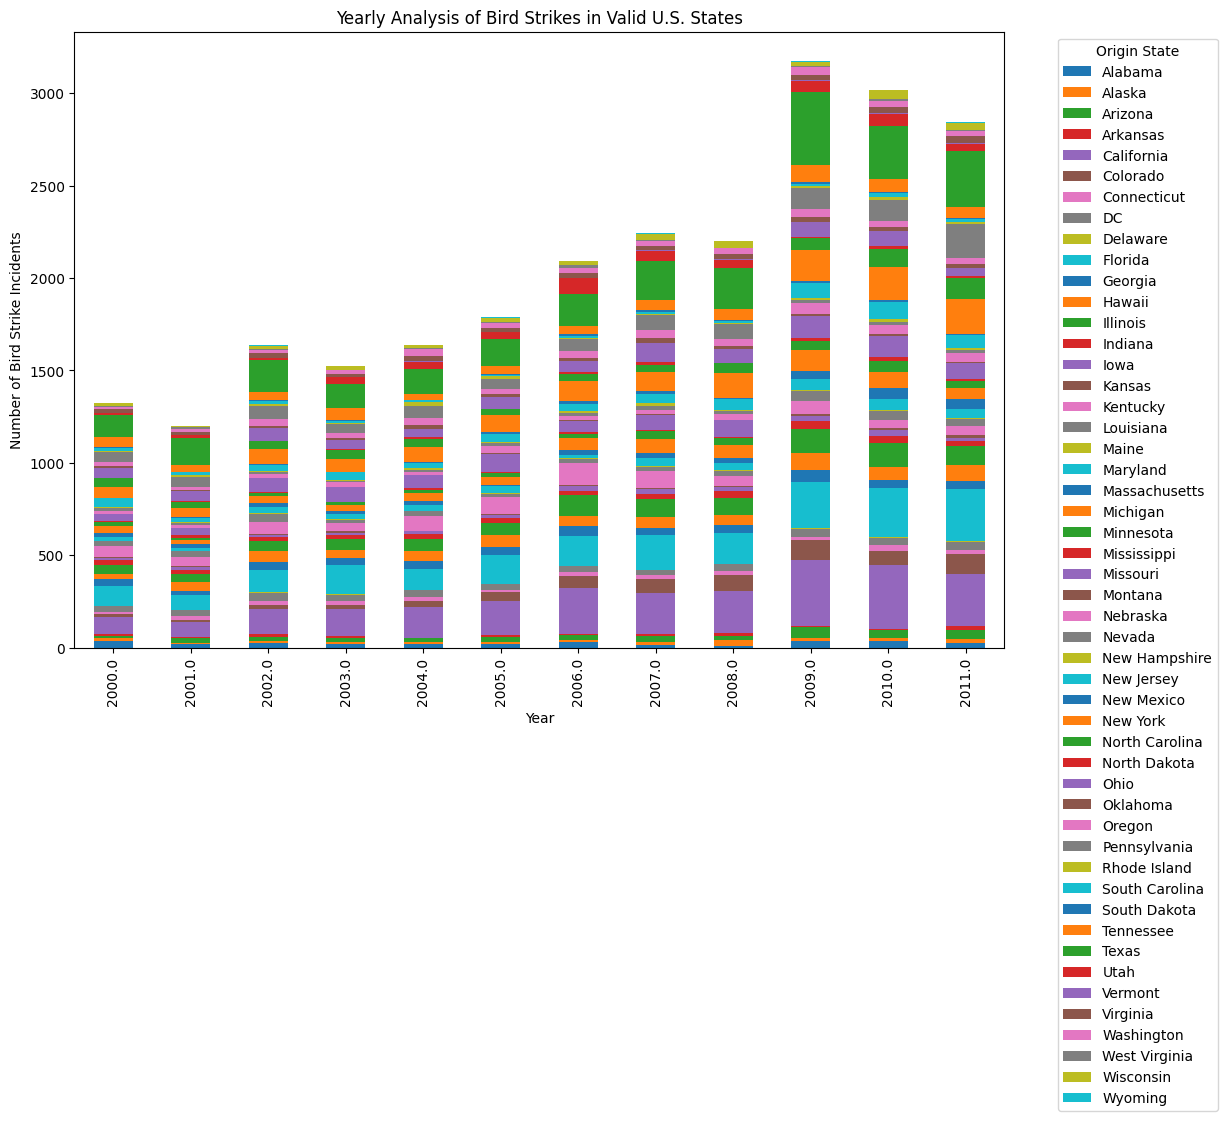

In [18]:
valid_us_states = ['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', 'Delaware', 'DC', 'Georgia', 'Florida', 'California', 'Illinois', 'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona', 'Tennessee', 'South Carolina', 'South Dakota', 'New Jersey', 'Colorado', 'Minnesota', 'Alabama', 'Ohio', 'Wisconsin', 'Michigan', 'Massachusetts', 'Alaska', 'North Carolina', 'Kentucky', 'Indiana', 'Oregon', 'Pennsylvania', 'New Hampshire', 'Arkansas', 'Nevada', 'Mississippi', 'Maryland', 'Maine', 'Utah', 'Nebraska', 'Iowa', 'New Mexico', 'West Virginia', 'Oklahoma', 'North Dakota', 'Vermont', 'Wyoming', 'Kansas', 'Montana']
bird_strikes_us_states = clean_data[clean_data['Origin State'].isin(valid_us_states)]
bird_strikes_us_states
# Count of bird strike incidents for valid U.S. states each year
bird_strikes_by_state_yearly = bird_strikes_us_states.groupby(['year', 'Origin State']).size().unstack()

# Plotting a stacked bar chart
bird_strikes_by_state_yearly.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Number of Bird Strike Incidents')
plt.title('Yearly Analysis of Bird Strikes in Valid U.S. States')
plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

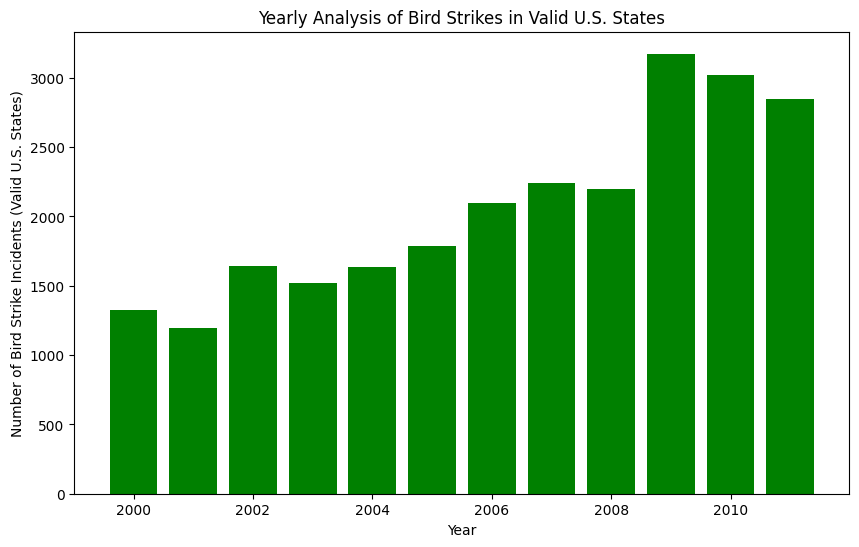

In [19]:
bird_strikes_us_states_yearly = bird_strikes_us_states.groupby('year').size()

# Plotting a bar chart for Yearly Analysis of Bird Strikes in valid U.S. states
plt.figure(figsize=(10, 6))
plt.bar(bird_strikes_us_states_yearly.index, bird_strikes_us_states_yearly.values, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strike Incidents (Valid U.S. States)')
plt.title('Yearly Analysis of Bird Strikes in Valid U.S. States')
plt.show()

In [20]:
bird_strikes_by_airline = bird_strikes_us_states['Aircraft: Airline/Operator'].value_counts()
bird_strikes_by_airline

SOUTHWEST AIRLINES           4610
BUSINESS                     3032
AMERICAN AIRLINES            1809
DELTA AIR LINES              1302
AMERICAN EAGLE AIRLINES       905
                             ... 
JETCORP                         1
ISLAND EXPRESS                  1
AIR AMERICA/TOTAL AIR           1
AIR JAPAN                       1
MIDWEST AVIATION DIVISION       1
Name: Aircraft: Airline/Operator, Length: 284, dtype: int64

## Top 10 US Airlines for encountering bird strikes

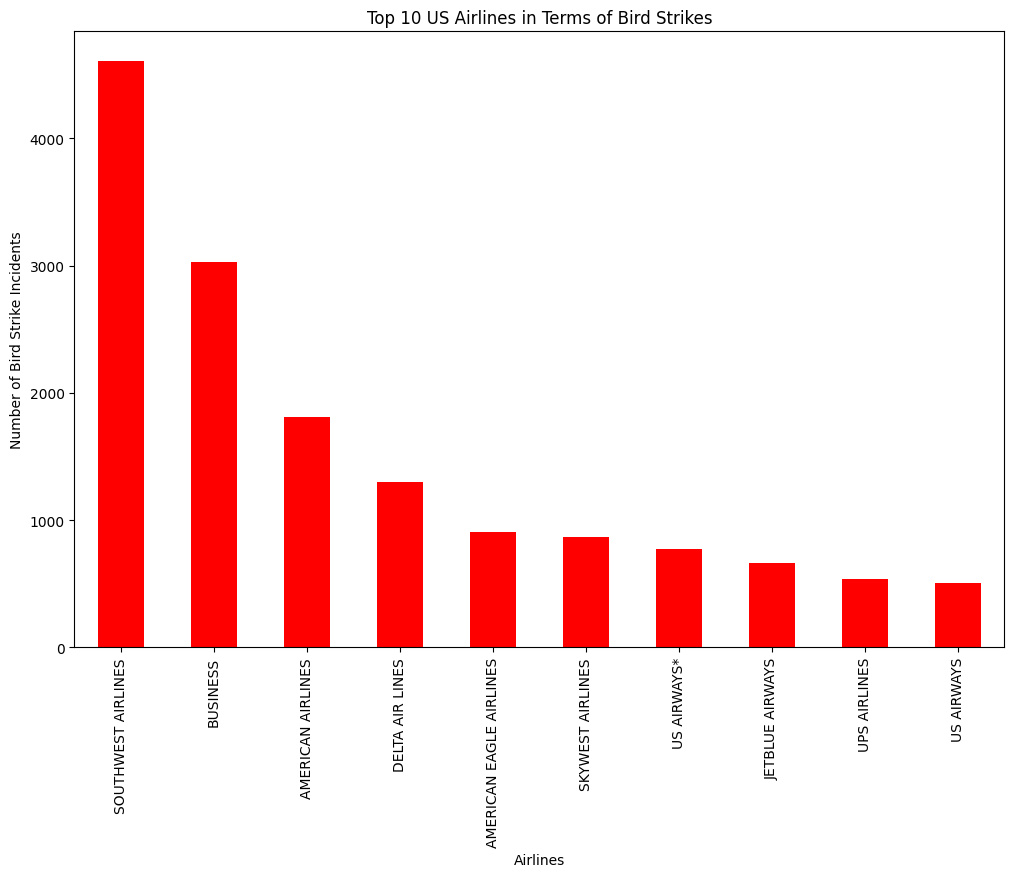

In [21]:
top_10_airlines = bird_strikes_by_airline.head(10)

# Plotting a bar chart for Top 10 US Airlines in terms of bird strikes
top_10_airlines.plot(kind='bar', figsize=(12, 8),color='red')
plt.xlabel('Airlines')
plt.ylabel('Number of Bird Strike Incidents')
plt.title('Top 10 US Airlines in Terms of Bird Strikes')
plt.show()

## Top 50 Airports with most incidents of bird strikes

In [22]:
bird_strikes_by_airport = clean_data['Airport: Name'].value_counts()
top_50_airports = bird_strikes_by_airport.head(50)
top_50_airports

DALLAS/FORT WORTH INTL ARPT               803
SACRAMENTO INTL                           676
SALT LAKE CITY INTL                       479
DENVER INTL AIRPORT                       476
KANSAS CITY INTL                          452
PHILADELPHIA INTL                         442
ORLANDO INTL                              408
BALTIMORE WASH INTL                       401
LOUISVILLE INTL ARPT                      395
JOHN F KENNEDY INTL                       390
CHARLOTTE/DOUGLAS INTL ARPT               367
NASHVILLE INTL                            364
LAMBERT-ST LOUIS INTL                     363
CHICAGO O'HARE INTL ARPT                  332
DETROIT METRO WAYNE COUNTY ARPT           321
PORTLAND INTL (OR)                        313
NEWARK LIBERTY INTL ARPT                  305
CINCINNATI/NORTHERN KENTUCKY INTL ARPT    302
ATLANTA INTL                              296
CHICAGO MIDWAY INTL ARPT                  296
HOUSTON-HOBBY                             294
FORT LAUDERDALE/HOLLYWOOD INTL    

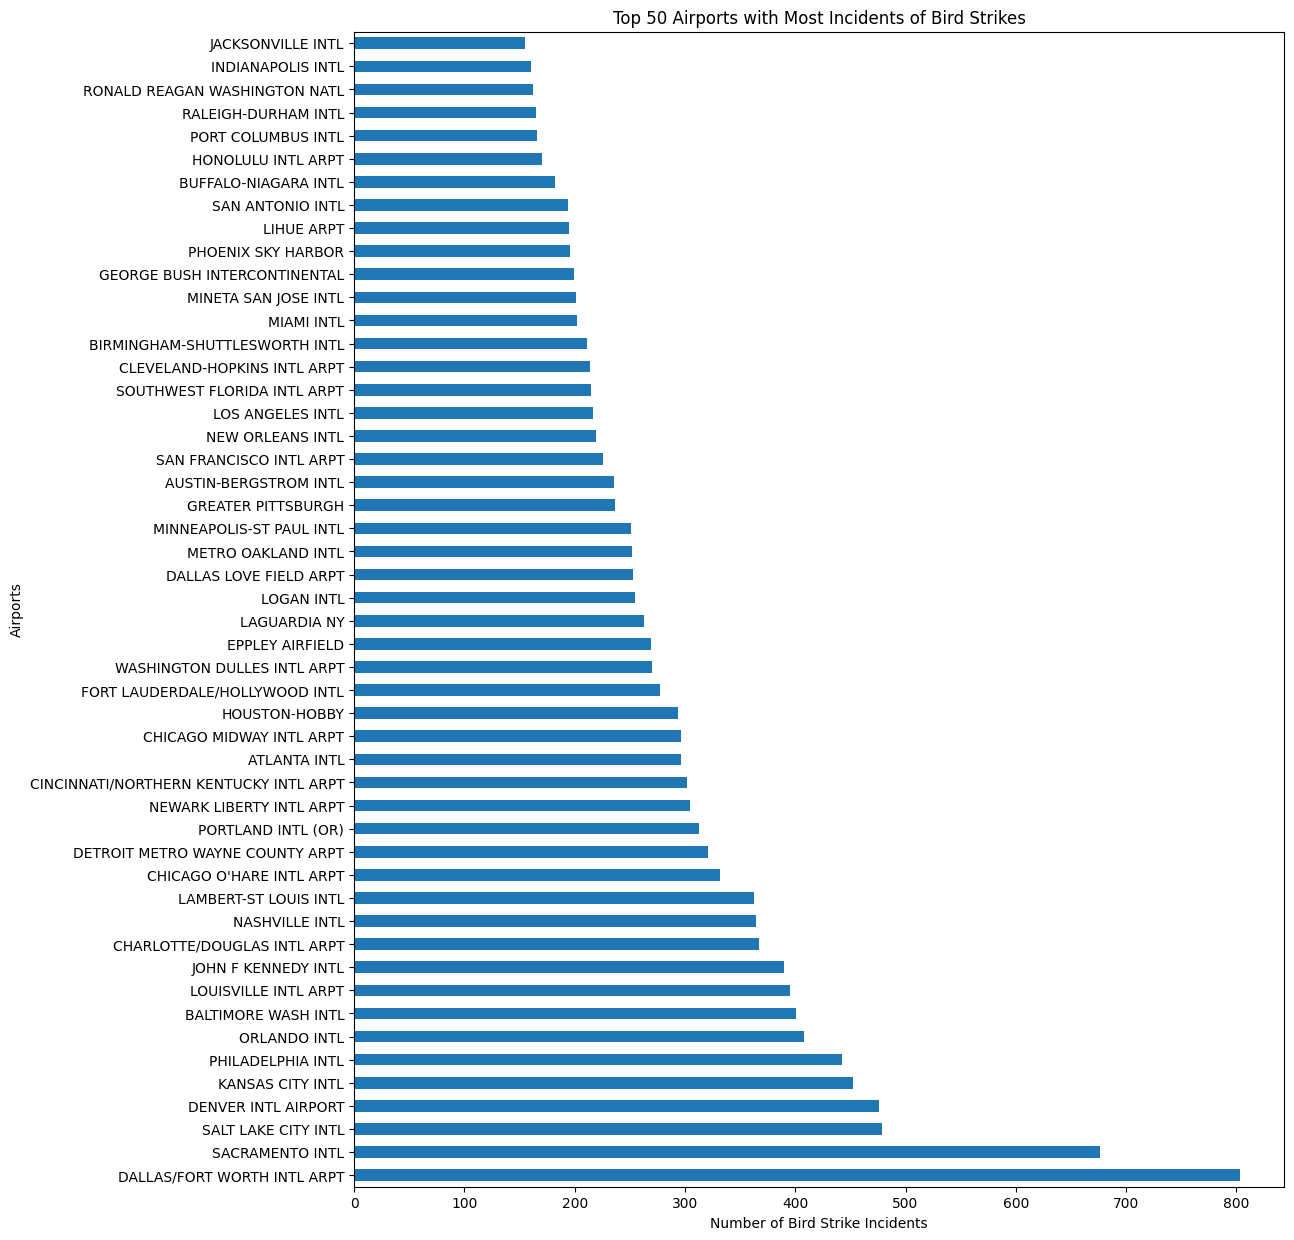

In [23]:
top_50_airports.plot(kind='barh', figsize=(12, 15))
plt.xlabel('Number of Bird Strike Incidents')
plt.ylabel('Airports')
plt.title('Top 50 Airports with Most Incidents of Bird Strikes')
plt.show()

## Yearly cost incurred due to bird strikes

In [24]:
clean_data['Cost: Total $'] = pd.to_numeric(clean_data['Cost: Total $'].replace('[^\d.]', '', regex=True), errors='coerce')
yearly_cost_due_to_bird_strikes = clean_data.groupby('year')['Cost: Total $'].sum()
yearly_cost_due_to_bird_strikes

year
2000.0     5625496
2001.0    23252168
2002.0     9046405
2003.0    13176787
2004.0     8116866
2005.0     7026670
2006.0    18309903
2007.0    10822426
2008.0    11966121
2009.0     9564327
2010.0    11459879
2011.0    13180130
Name: Cost: Total $, dtype: int64

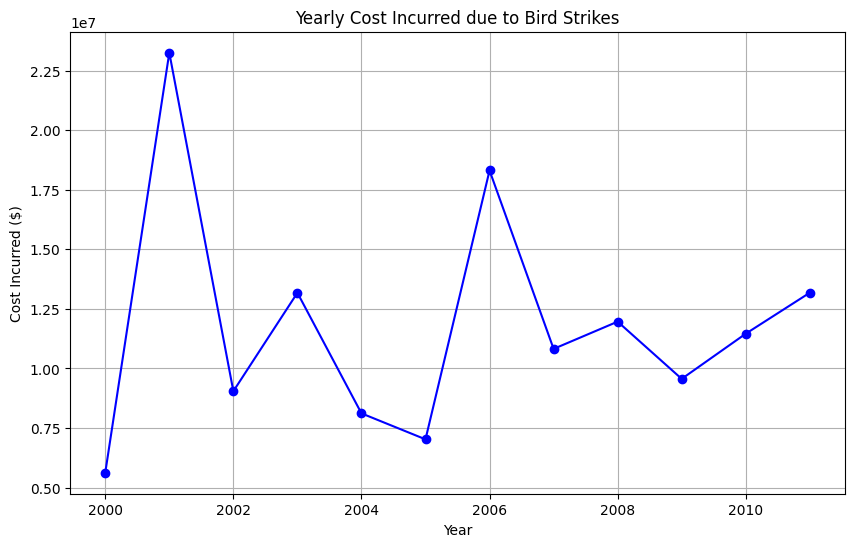

In [25]:
# Plotting a line chart for Yearly Cost Incurred due to Bird Strikes
plt.figure(figsize=(10, 6))
plt.plot(yearly_cost_due_to_bird_strikes.index, yearly_cost_due_to_bird_strikes.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Cost Incurred ($)')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.grid(True)
plt.show()

## When do most bird strikes occur?

In [26]:
bird_strikes_by_phase = clean_data['When: Phase of flight'].value_counts()
bird_strikes_by_phase


Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Taxi               74
Parked             10
Name: When: Phase of flight, dtype: int64

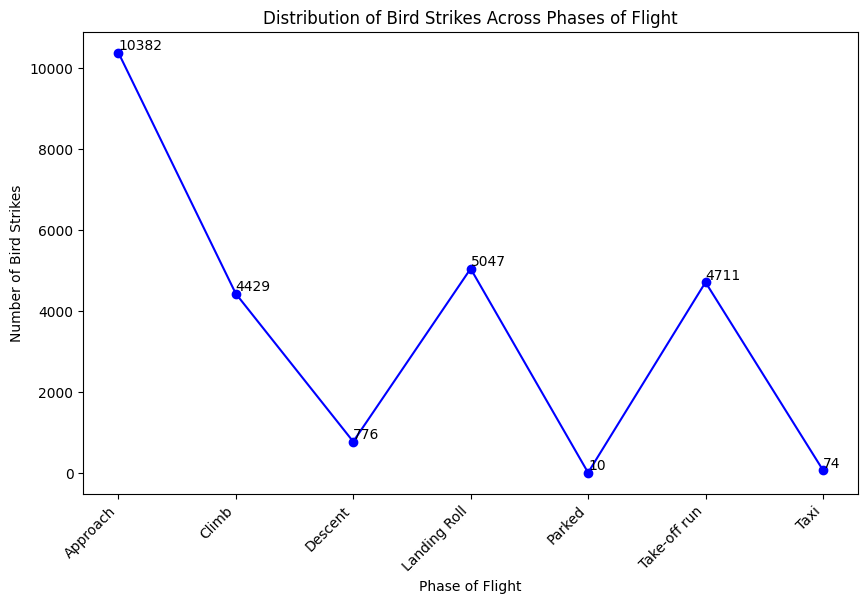

In [27]:
sorted_phases = bird_strikes_by_phase.index.sort_values()

# Plotting a line plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_phases, bird_strikes_by_phase[sorted_phases], marker='o', linestyle='-', color='b')

plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.title('Distribution of Bird Strikes Across Phases of Flight')

plt.xticks(rotation=45, ha='right')

# Displaying values on data points
for x, y in zip(sorted_phases, bird_strikes_by_phase[sorted_phases]):
    plt.text(x, y, f'{y}', ha='left', va='bottom')

plt.show()

## Altitude of aeroplanes at the time of strike

In [28]:
altitude_data = clean_data[['Altitude bin','Wildlife: Number Struck Actual']]

# Grouping by altitude and calculating the total number of bird strikes at each altitude
bird_strikes_by_altitude = altitude_data.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum()
bird_strikes_by_altitude

Altitude bin
< 1000 ft    59802
> 1000 ft     8847
Name: Wildlife: Number Struck Actual, dtype: int64

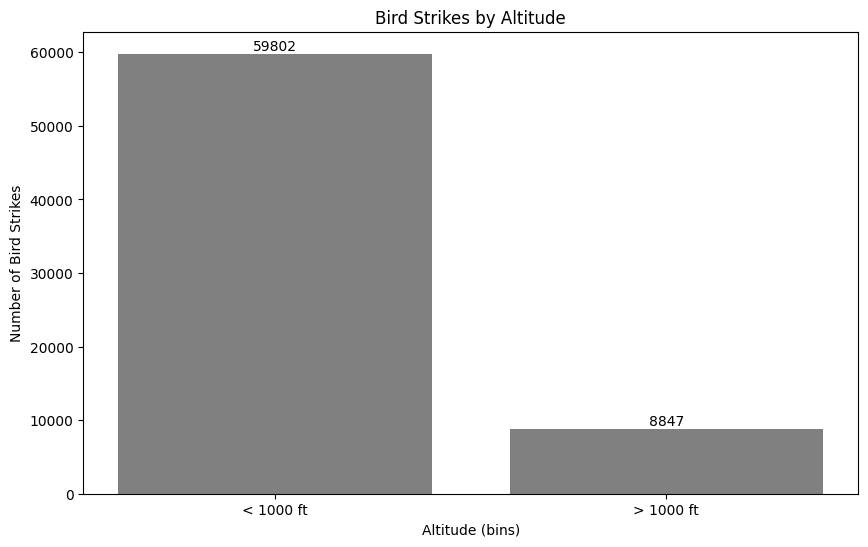

In [29]:
sorted_altitudes = bird_strikes_by_altitude.index.sort_values()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_altitudes, bird_strikes_by_altitude[sorted_altitudes], color='grey', label='Bird Strikes')

plt.xlabel('Altitude (bins)')
plt.ylabel('Number of Bird Strikes')
plt.title('Bird Strikes by Altitude')

for x, y in zip(sorted_altitudes, bird_strikes_by_altitude[sorted_altitudes]):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.show()

## Phase of flight at the time of strike

In [30]:
bird_strikes_by_phase = clean_data['When: Phase of flight'].value_counts()
bird_strikes_by_phase

Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Taxi               74
Parked             10
Name: When: Phase of flight, dtype: int64

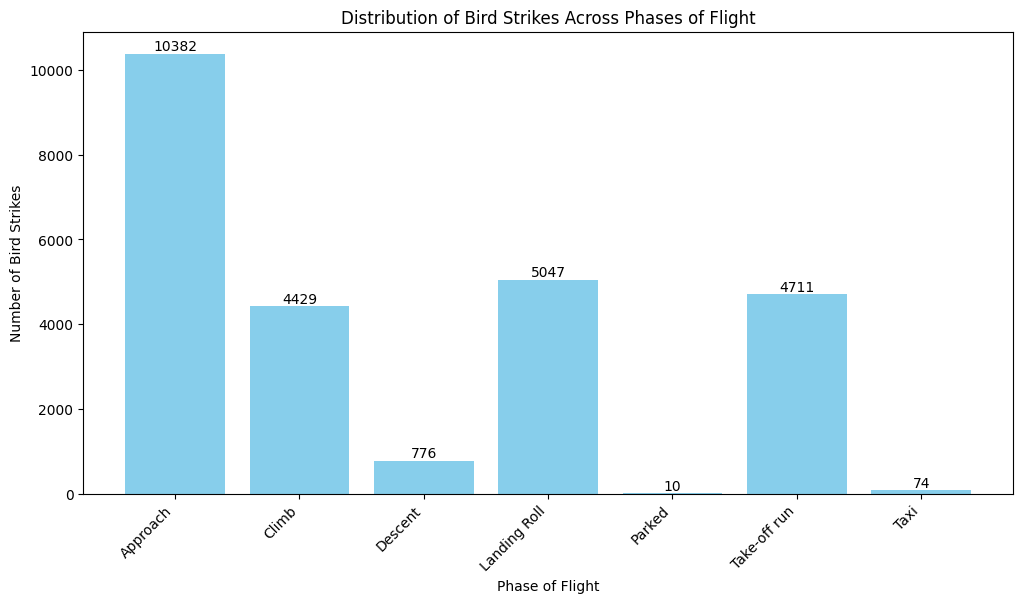

In [32]:
sorted_phases = bird_strikes_by_phase.index.sort_values()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_phases, bird_strikes_by_phase[sorted_phases], color='skyblue')

plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.title('Distribution of Bird Strikes Across Phases of Flight')

plt.xticks(rotation=45, ha='right')

# Displaying values on top of bars
for x, y in zip(sorted_phases, bird_strikes_by_phase[sorted_phases]):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.show()

## Average altitude of aeroplanes in different phases at the time of strike.

In [33]:
altitude_phase_data = clean_data[['When: Phase of flight', 'Altitude bin']]
altitude_phase_data

,When: Phase of flight,Altitude bin
0,Climb,> 1000 ft
1,Landing Roll,< 1000 ft
2,Approach,< 1000 ft
3,Climb,< 1000 ft
4,Approach,< 1000 ft
...,...,...
25553,Approach,> 1000 ft
25554,Landing Roll,< 1000 ft
25555,NaN,NaN
25556,Landing Roll,< 1000 ft


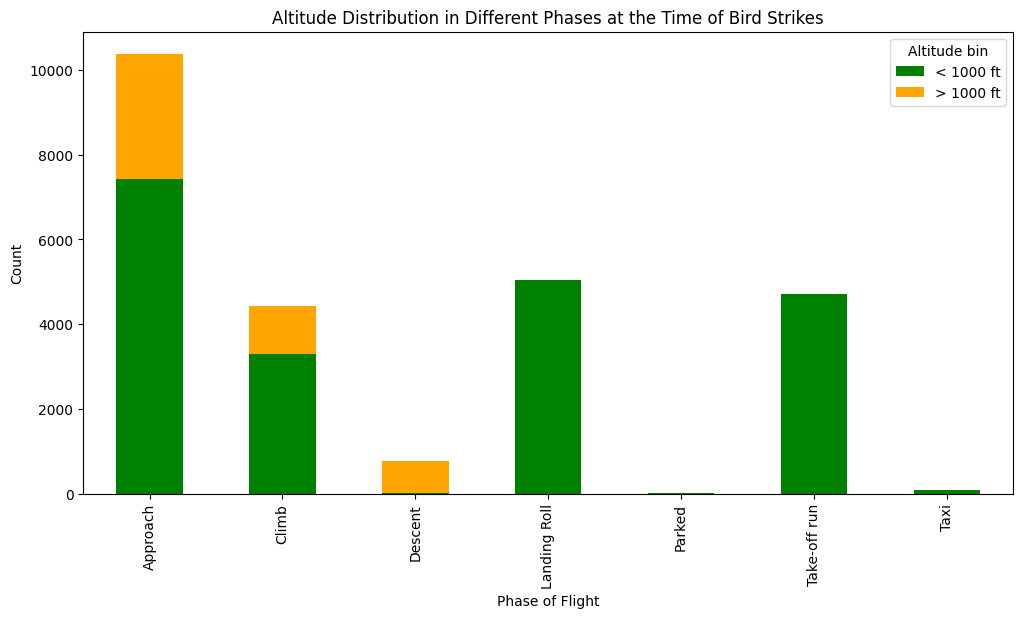

In [34]:
plt.figure(figsize=(12, 6))
pd.crosstab(altitude_phase_data['When: Phase of flight'], altitude_phase_data['Altitude bin']).plot(kind='bar', stacked=True, color=['green', 'orange'], ax=plt.gca())

plt.xlabel('Phase of Flight')
plt.ylabel('Count')
plt.title('Altitude Distribution in Different Phases at the Time of Bird Strikes')
plt.legend(title='Altitude bin', loc='upper right')

plt.show()

## Effect of bird strikes & impact on flight

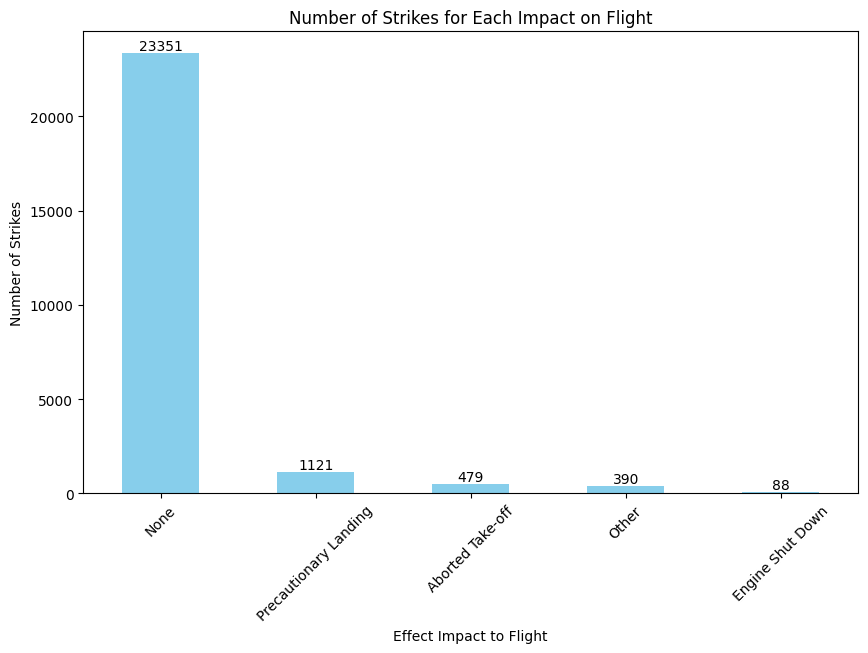

In [35]:
plt.figure(figsize=(10, 6))
impact_counts = clean_data['Effect: Impact to flight'].value_counts()
ax=impact_counts.plot(kind='bar', color='skyblue')
for i, v in enumerate(impact_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.title('Number of Strikes for Each Impact on Flight')
plt.xlabel('Effect Impact to Flight')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.show()

## Effect of strike at different altitude

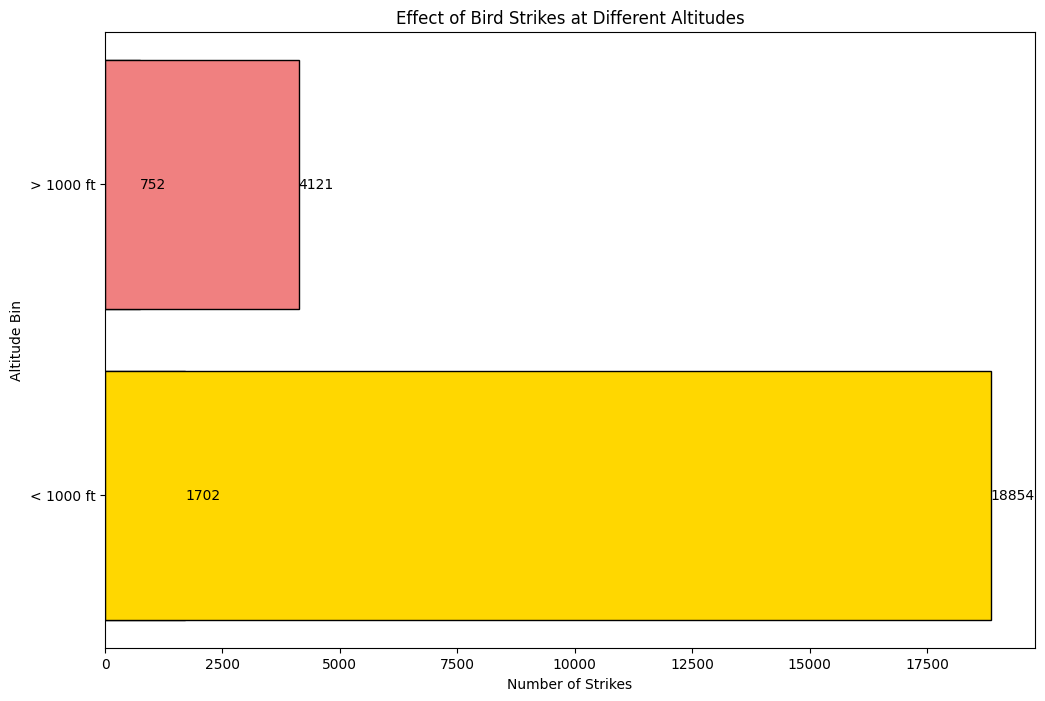

In [63]:
plt.figure(figsize=(12, 8))

altitude_effect_counts = clean_data.groupby(['Altitude bin', 'Effect: Indicated Damage']).size().reset_index(name='Number of Strikes')

colors = ['lightcoral', 'gold', 'lightblue']

# Plot using Matplotlib barh
for index, row in altitude_effect_counts.iterrows():
    current_color = colors[index % len(colors)]
    plt.barh(row['Altitude bin'], row['Number of Strikes'], color=current_color, edgecolor='black', label=row['Effect: Indicated Damage'])

    plt.text(row['Number of Strikes'] + 0.1, row['Altitude bin'], str(row['Number of Strikes']), ha='left', va='center', fontsize=10, color='black')

plt.title('Effect of Bird Strikes at Different Altitudes')
plt.ylabel('Altitude Bin')
plt.xlabel('Number of Strikes')

plt.show()



## Prior Waring given to Pilots?

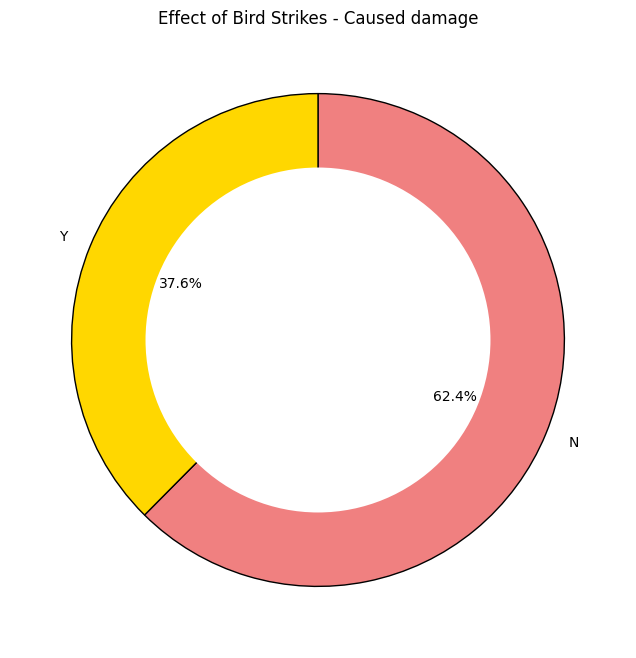

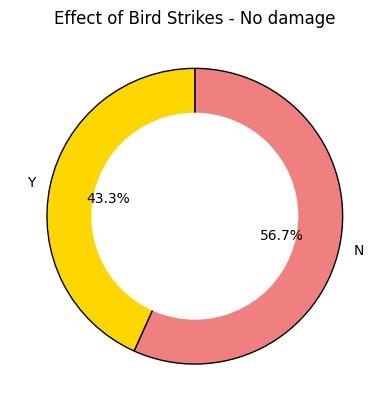

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

pilot_warning_effect_counts = clean_data.groupby(['Pilot warned of birds or wildlife?', 'Effect: Indicated Damage']).size().reset_index(name='Number of Strikes')

pivot_table = pilot_warning_effect_counts.pivot_table(index='Effect: Indicated Damage', columns='Pilot warned of birds or wildlife?', values='Number of Strikes', fill_value=0)

# Plot using Matplotlib pie chart
colors = ['lightcoral', 'gold']
labels = pilot_warning_effect_counts['Pilot warned of birds or wildlife?'].unique()

for i, category in enumerate(pivot_table.index):
    plt.pie(pivot_table.loc[category], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(edgecolor='black'))

    # Draw a circle at the center to make it look like a donut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(f'Effect of Bird Strikes - {category}')

    plt.show()
